### Task 2: EDA and Data Cleaning
    1. Loading/ reading data through pandas into dataframes
    2. Check data types and Format data
    3. General statistics about the dataframes
    4. Data Visualization
    5. Data Cleaning
   

In [1]:
#import dependencies/ packages
import pandas as pd
import numpy as np
import datetime
import pickle

#import libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#show plots into jupyter notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #to fix blurry text on plots

#set default theme for plotting
sns.set_context("notebook")
sns.set_style("darkgrid")

#set max number of columns to be displayed
pd.set_option('display.max_columns', 50)

### 1. Loading Data using Pandas

#### Data Source
    URL's provided in the resources for the Internship

In [2]:
#import data URL's
from Data_Urls import TRAINING_DATA_URL, HISTORY_DATA_URL, CHURN_DATA_URL

In [3]:
# loading data into DataFrames using pandas
train_data = pd.read_csv(TRAINING_DATA_URL)
churn_data = pd.read_csv(CHURN_DATA_URL)
history_data = pd.read_csv(HISTORY_DATA_URL)

#### Preview the loaded Datasets

In [4]:
#preview top 5 rows
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [5]:
#preview last 5 rows
train_data.tail()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,2009-12-18,2015-12-21,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392


**There are a lot of missing values in columns. Need to further explore to decide if we can drop or need to keep these columns or impute values**

In [6]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [7]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
history_data.tail()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


**There are a lot of "0" values in the dataset. These can be imputed based on the data statistics while cleaning data**

#### Merge DataFrames
    We can merge train_data and churn_data on 'id' column for useful analysis

In [9]:
# merge train_data and churn_data dataframes into one

train = pd.merge(train_data, churn_data, on='id')

#preview merged dataframe
train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


### 2. Format Data
    Check data types for the dataframe cloumns and parse it into correct dtypes

**Dates are by default casted as object datatypes, unless specified. We need to convert it to datetime dtypes for time series analysis.
Churn values are integers and can consider them as equivalent to boolean values**

In [10]:
#check data types using dtypes method for pandas dataframe

train.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [11]:
history_data.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

As expected dates are "objects" and need to be casted to datetime data type.

#### Format Dates

In [12]:
#create a subset of the date columns to format 
#dates = train[['id', 'date_activ','date_end','date_first_activ','date_modif_prod','date_renewal','churn']].copy()

#Transform date columns into datetime dtypes
train['date_activ'] = pd.to_datetime(train['date_activ'], format='%Y-%m-%d')
train['date_end'] = pd.to_datetime(train['date_end'], format='%Y-%m-%d')
train['date_first_activ'] = pd.to_datetime(train['date_first_activ'], format='%Y-%m-%d')
train['date_modif_prod'] = pd.to_datetime(train['date_modif_prod'], format='%Y-%m-%d')
train['date_renewal'] = pd.to_datetime(train['date_renewal'], format='%Y-%m-%d')

#format dates in History_data
history_data["price_date"] = pd.to_datetime(history_data["price_date"], format='%Y-%m-%d')

### 3. DataFrame Statistics
    Basic statistics about the data to check for data distribution, skewness, min/max values, standard deviation etc.

In [13]:
# using describe() method to to view some basic statistical details like percentile, mean, std etc
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


Some key facts:
> 1. The minimum values for `consumption` and `forecast` are negative. This is likely corrupt data as customers cannot be returning power.
> 2. Also data seems to be highly skewed as per the percentiles

In [14]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


> `fix price` has negative minimum values. This might be a corrupt data as well, but we can determine while cleaning and impute data as required

In [15]:
#concise summary of dataframes using info() method-- 
# info method prints information about index and column dtypes, non-null values and memory usage

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   campaign_disc_ele         0 non-null      float64       
 3   channel_sales             11878 non-null  object        
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16094 non-null  datetime64[ns]
 9   date_first_activ          3508 non-null   datetime64[ns]
 10  date_modif_prod           15939 non-null  datetime64[ns]
 11  date_renewal              16056 non-null  datetime64[ns]
 12  forecast_base_bill

there are **16096** indexes or records in the dataframe. 'id' is used to identify the customers, we can look for unique id's to identify if there are multiple line records for same customers

In [16]:
#check for number of unique entries
train['id'].nunique()

16096

In [17]:
#check for null value counts per column and projecting it as %age of total entries
#since number of unique 'id' is same as number of index, we can either hard code or use len(index) method

pd.DataFrame({'Missing values (%age)':train.isnull().sum()/len(train.index)*100})

,Missing values (%age)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [18]:
#summary of history_data
history_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            193002 non-null  object        
 1   price_date    193002 non-null  datetime64[ns]
 2   price_p1_var  191643 non-null  float64       
 3   price_p2_var  191643 non-null  float64       
 4   price_p3_var  191643 non-null  float64       
 5   price_p1_fix  191643 non-null  float64       
 6   price_p2_fix  191643 non-null  float64       
 7   price_p3_fix  191643 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [19]:
#missing values
pd.DataFrame({'Missing values (%age)':history_data.isnull().sum()/len(history_data.index)*100})

,Missing values (%age)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


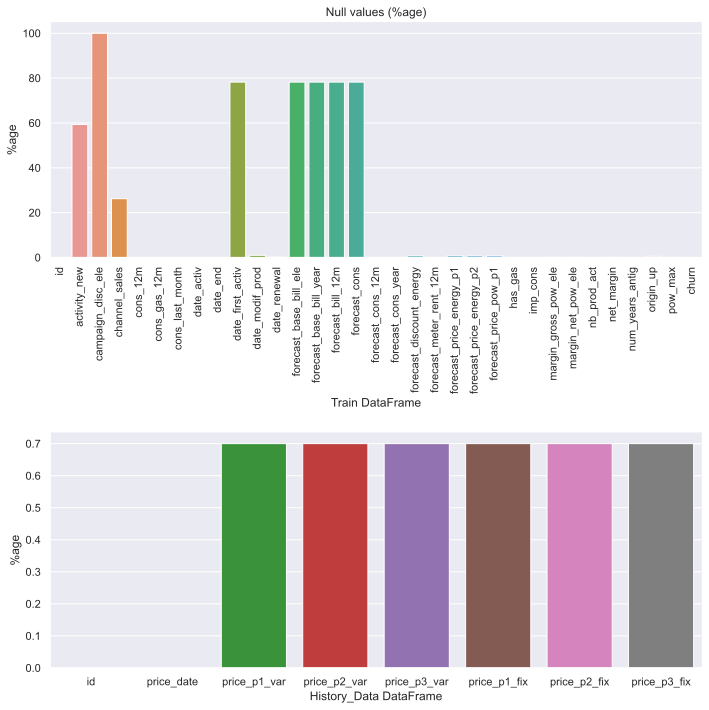

In [20]:
#plot null value counts as %age of total records per column
fig, axs = plt.subplots(nrows=2, figsize=(10,10))

sns.barplot(x=train.columns, y=round(train.isnull().sum()/len(train.index)*100,2), ax=axs[0])
sns.barplot(x=history_data.columns, y= round(history_data.isnull().sum()/len(history_data.index)*100,2), ax=axs[1])

#add labels
axs[0].set_ylabel("%age")
axs[0].set_xticklabels(train.columns,rotation=90)
axs[0].set_title('Null values (%age)')
axs[0].set_xlabel("Train DataFrame")

axs[1].set_ylabel("%age")
axs[1].set_xticklabels(history_data.columns)
axs[1].set_xlabel("History_Data DataFrame")


# Finalize the plot
sns.despine()

plt.tight_layout(h_pad=2)

All values are missing in `campaign_disc_ele`-- electricity campaign the customer last subscribed to. We can easily drop this column for our analysis.<br>

Around 60% values in `activity_new` and about 25% values in `channel_sales` are missing. However we cannot disregard these features and will be valuable for our predictive analysis.<br>

More than 75% values in `date_first_activ` column are missing.
> Looking at `date_activ` and `date_first_activ` column descriptions, it is safe to assume that both columns can have the same values, as all customer id's are unique.<br>
> We can validate this assumption by comparing both columns where `date_first_activ` values are available

other columns with more than 75% missing values can be removed too, as they will be of no significance in the analysis

In [21]:
#filter dataframe where 'date_first_activ' column values are not null and display only date columns

train[['id','date_activ','date_end','date_first_activ']][train['date_first_activ'].isna()==False]

,id,date_activ,date_end,date_first_activ
5,568bb38a1afd7c0fc49c77b3789b59a3,2010-04-08,2016-04-08,2010-04-08
7,1aa498825382410b098937d65c4ec26d,2011-12-09,2016-12-09,2011-12-09
9,01495c955be7ec5e7f3203406785aae0,2010-04-21,2016-04-21,2010-04-21
14,2c05848e1a577dd041ea6804bbf5bbf5,2011-09-01,2016-10-30,2011-09-01
19,bd14bbac3aca710ee5288fcd8511d4bb,2010-02-15,2016-02-15,2010-02-15
...,...,...,...,...
16068,094cf00900a8d94dfe880d05218c497c,2010-05-14,2016-05-13,2010-05-14
16079,87888ca871125888a38d42dceeb16b6e,2011-09-30,2016-09-30,2011-09-30
16082,c525fcb0860e5705d37743f5b5cadbfe,2012-10-23,2016-11-12,2012-10-23
16090,c49217f16a06263e5381eaba94a67a8b,2013-02-08,2016-02-08,2013-02-08


>`date_activ` and `date_first_active` columns have same values. Having both the columns is redundant and we can remove the `date_first_activ` column.

### 4. Data Visualization

#### CHURN RATE

In [22]:
# using subset of train dataframe
churn_df = train[['id','churn']].set_index('id')

#total number of enteries
total= len(churn_df.index)

#count no.of companies not churned as %age of total
retention = churn_df[churn_df['churn']==0].count()/total*100

#count no.of companies churned as %age of total
churn = churn_df[churn_df['churn']==1].count()/total*100

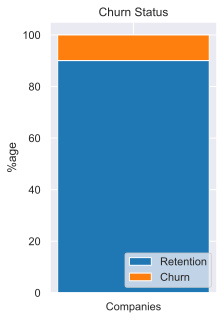

In [23]:
#plot for churn/retention
fig, ax = plt.subplots(figsize=(3,5))

ax.bar(x="Companies",height=retention,label='Retention')
ax.bar(x="Companies",height=churn, bottom=retention, label='Churn')

ax.set_ylabel('%age')
ax.set_title('Churn Status')
ax.legend(loc="lower right")

plt.show()

**Churn rate is about 10%**

#### ACTIVITY 

In [24]:
#check for uniques values in company's activity column with no. of companies
train['activity_new'].value_counts()

apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
ckfxocssowaeipxueikxcmaxdmcduxsa     189
                                    ... 
xumuokeiidieboawuxkidxufcexecbbl       1
aacewucldmklslcffeckexipaemmsdfk       1
wkwdccuiboaeaalcaawlwmldiwmpewma       1
waixukdfidxusmdwibmxxkkxbbmbslbf       1
cwcwxxdfpcxwfouoaeoofsluifdoxxpe       1
Name: activity_new, Length: 419, dtype: int64

In [25]:
#select the data subset for activity
activity= train[['id','activity_new','churn']]

In [26]:
#group activities by churn and activity code and count the companies
activity= activity.groupby([activity['activity_new'],activity['churn']])['id'].count()\
            .unstack(level=1)\
            .sort_values(by=[0], ascending=False)

In [27]:
activity

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0
...,...,...
opoiuuwdmxdssidluooopfswlkkkcsxf,NaN,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,NaN,2.0
wceaopxmdpccxfmcdpopulcaubcxibuw,NaN,1.0


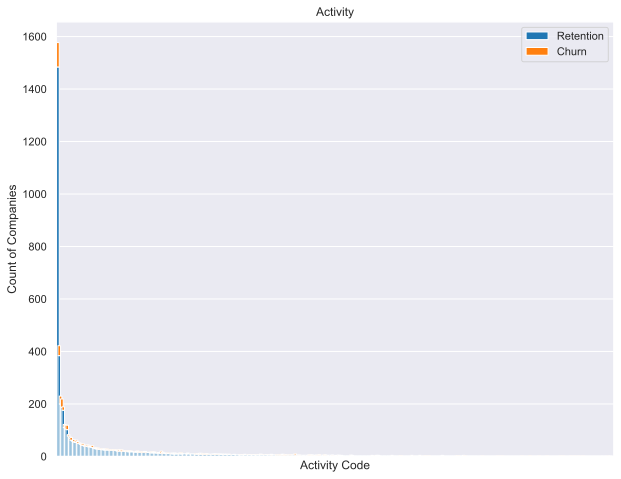

In [28]:
#activity plot
activity.plot(kind='bar',
             figsize=(10,8),
             width=2, stacked=True,
             title="Activity")
#labels
plt.ylabel("Count of Companies")
plt.xlabel("Activity Code")

#rename legend
plt.legend(['Retention','Churn'], loc='upper right')

plt.xticks([])
plt.show()



*Churn* is not specific to any particular activity. It is distributed. However some activites are subscribed to a very small number of companies.

In [29]:
#showing churn as %age and number of companies per activity
activity_total= activity.fillna(0)[0]+ activity.fillna(0)[1]
activity_churn=activity.fillna(0)[1]/activity_total*100

#display as dataframe
pd.DataFrame({"%age Churn": activity_churn,
             "# of Comp.": activity_total}).sort_values(by="%age Churn", ascending=False).head(20)

,%age Churn,# of Comp.
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


Churn is higher for some of the activities as only a few companies are subscrived to that activity
<br>
This will skew our prediction model.

#### SALES CHANNEL

In [30]:
train['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

There are 7 unique sales channels for the company. Also there are about 25% missing values. 

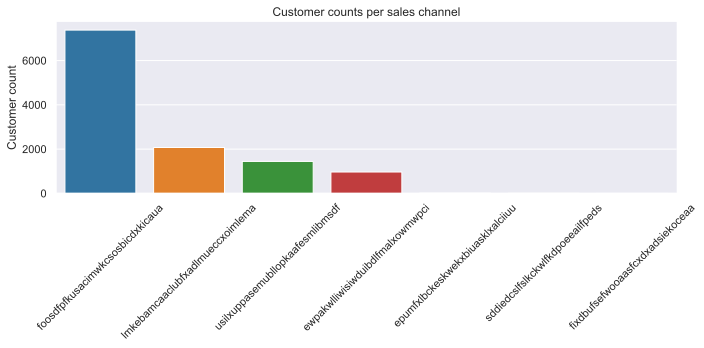

In [31]:
#plot number od customers for the sales channel
sales_chan=['foosdfpfkusacimwkcsosbicdxkicaua',
            'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa']
subs_count=list(train['channel_sales'].value_counts())

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x=sales_chan, y=subs_count)

#add labels
ax.set_ylabel('Customer count')
ax.set_xticklabels(sales_chan, rotation=45)
ax.set_title('Customer counts per sales channel')

# Finalize the plot
sns.despine()

plt.tight_layout(h_pad=2)

In [32]:
#select data subset for churn
channel= train[['id','channel_sales','churn']]
channel= channel.groupby([channel['channel_sales'], 
                          channel['churn']])['id'].count()\
                        .unstack(level=1).sort_values(by=[0], ascending= False)


In [33]:
channel

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,NaN
epumfxlbckeskwekxbiuasklxalciiuu,4.0,NaN
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,NaN


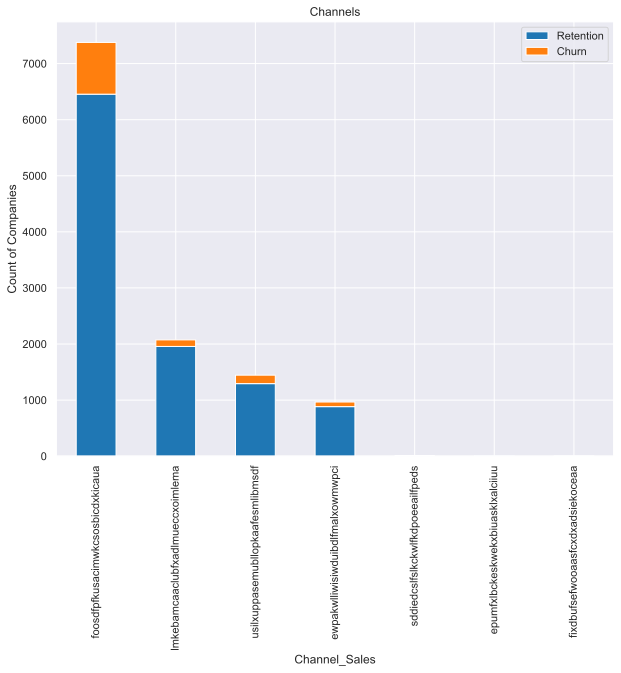

In [34]:
#Channel plot for number of companies
channel.plot(kind='bar',
             figsize=(10,8),
             width=0.5, stacked=True,
             title="Channels", rot=90)
#labels
plt.ylabel("Count of Companies")
plt.xlabel("Channel_Sales")

#rename legend
plt.legend(['Retention','Churn'], loc='upper right')

plt.show()

In [35]:
#channel churn as %age
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)


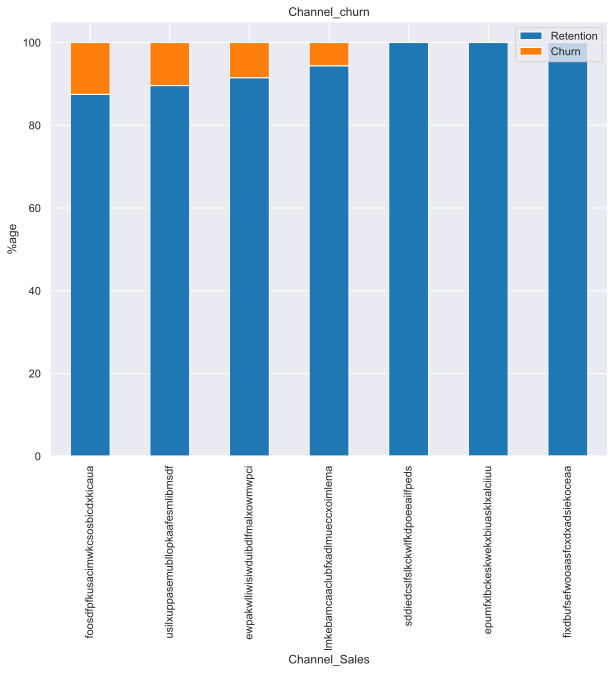

In [36]:
#Channel plot for number of companies
channel_churn.plot(kind='bar',
             figsize=(10,8),
             width=0.5, stacked=True,
             title="Channel_churn", rot=90)
#labels
plt.ylabel("%age")
plt.xlabel("Channel_Sales")

#rename legend
plt.legend(['Retention','Churn'], loc='upper right')

plt.show()

In [37]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage": round(channel_percentage,2),
              "Total companies": channel_total }).sort_values(by="Churn percentage",
                                                               ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.50,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.39,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.49,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.60,2073.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.00,12.0
epumfxlbckeskwekxbiuasklxalciiuu,0.00,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.00,2.0


#### CHURN BY DATES 

In [38]:
#data subset for dates
dates = train[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

In [39]:
def plot_dates(dataframe, column, fontsize_=12):
    """
    Plot monthly churn and retention distribution
    """
    # Group by month
    temp = dataframe[[column,
                      "churn",
                      "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
# Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(13,10), rot=0)
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
    return month

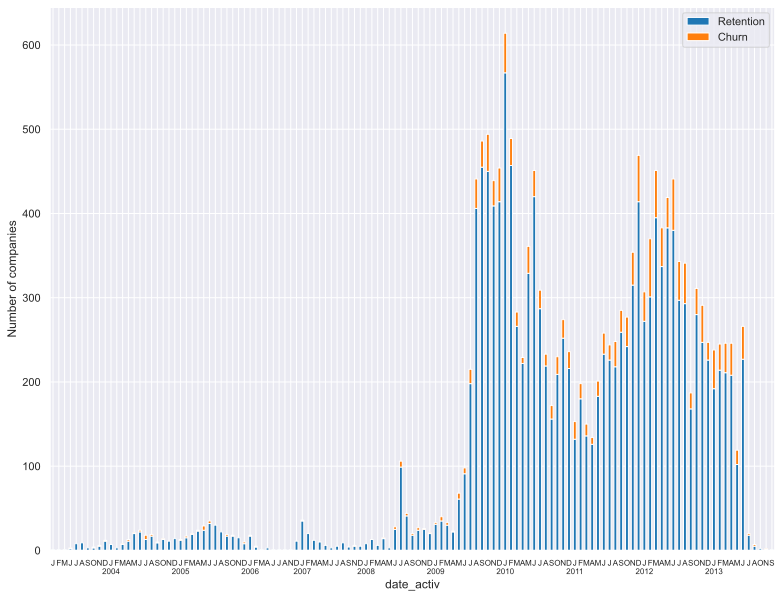

In [40]:
plot_dates(dates,'date_activ', fontsize_=8)

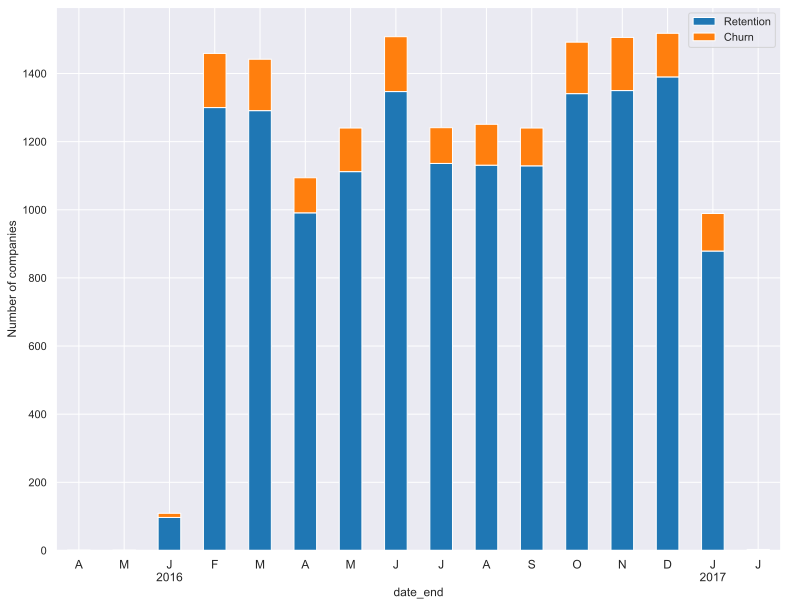

In [41]:
plot_dates(dates, "date_end")

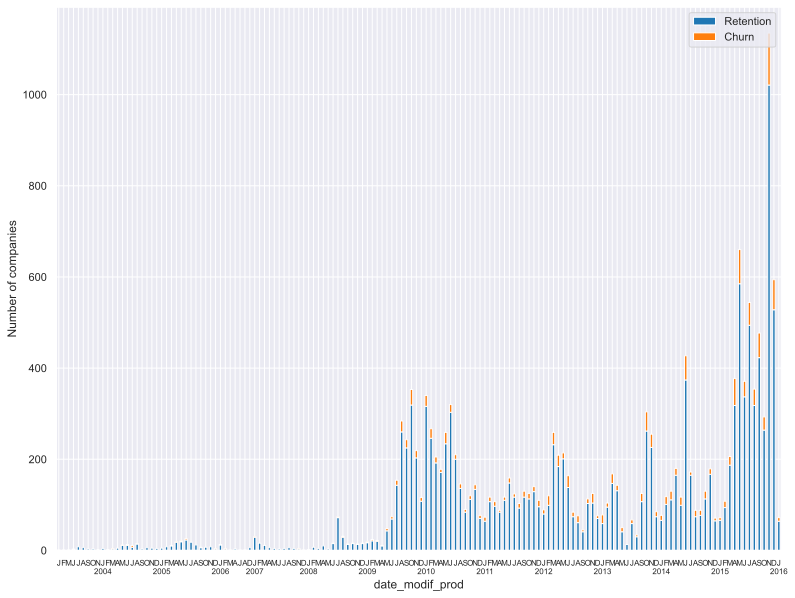

In [42]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

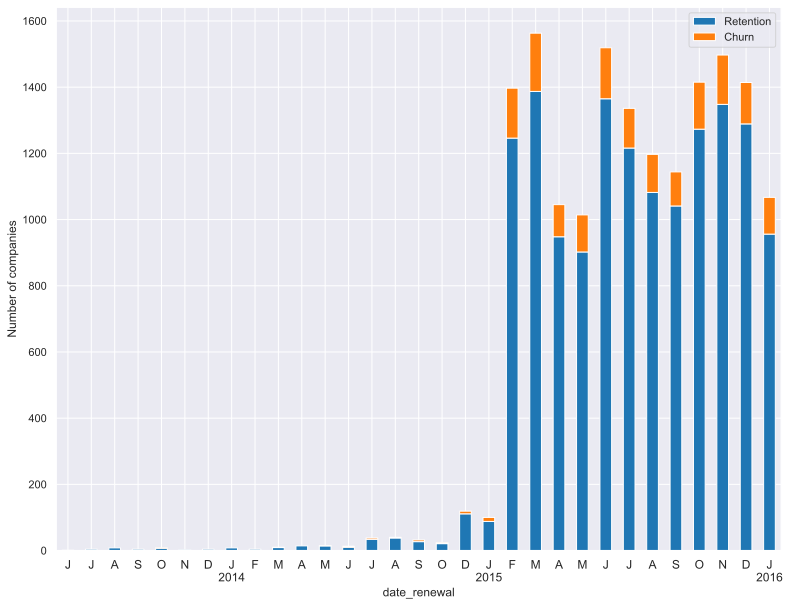

In [43]:
plot_dates(dates, "date_renewal")

#### CONSUMPTION
lets see the distribution of consumption through histograms

In [44]:
consumption = train[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]

In [45]:
#create function to create histograms for a dataframe
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temp dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                         "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

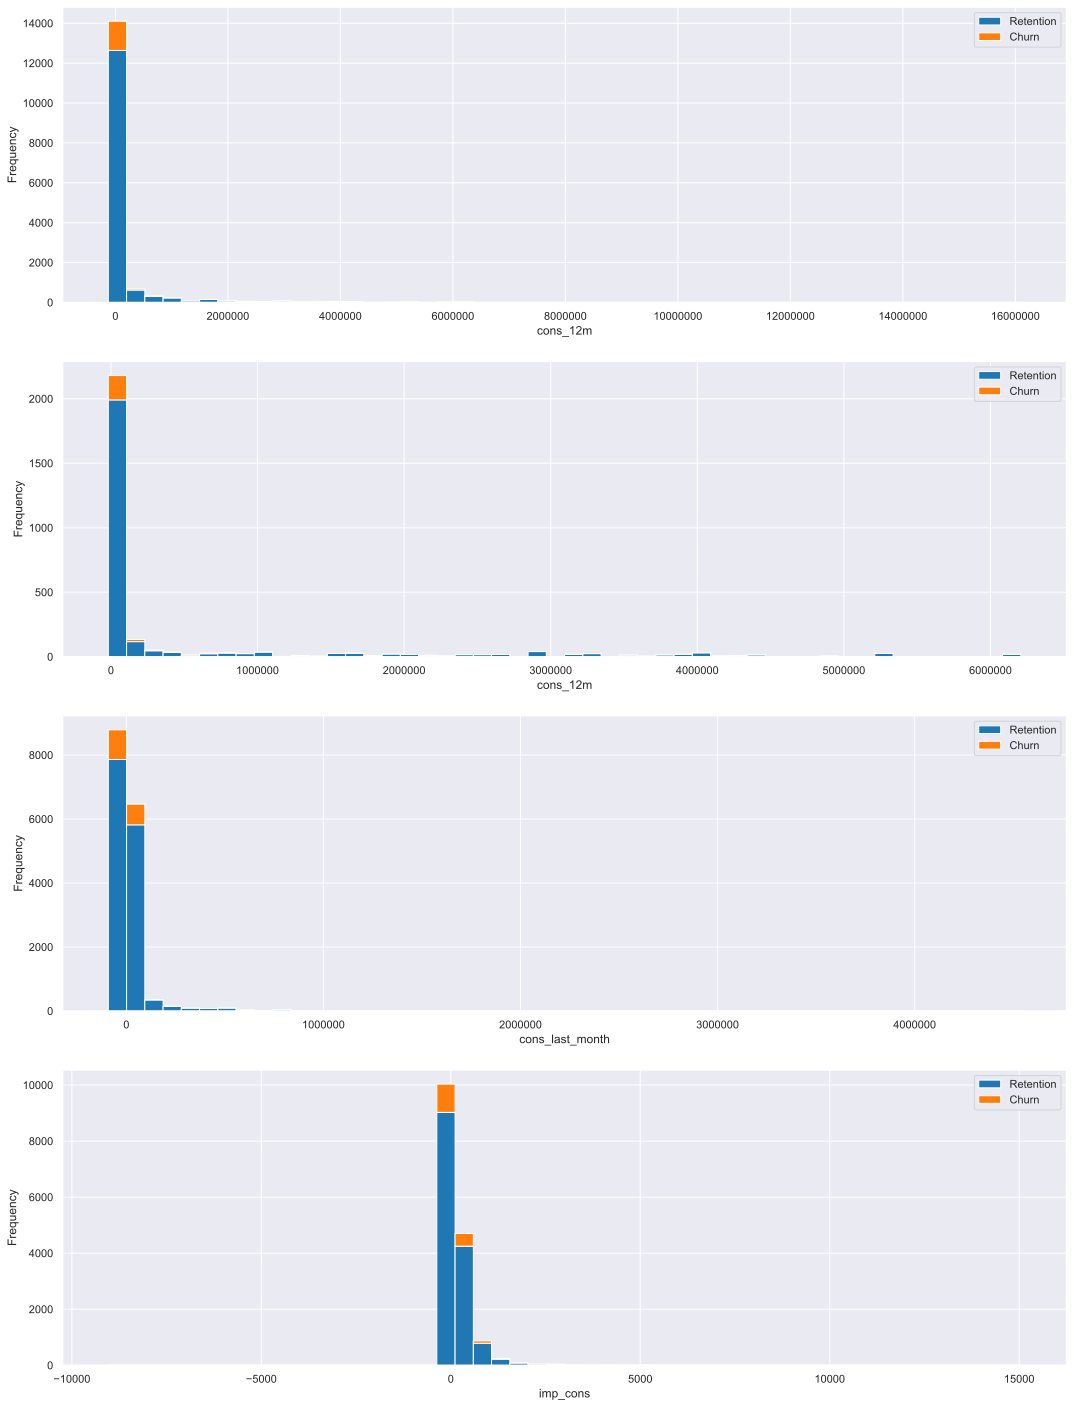

In [46]:
#define figure parameters for plotting
fig,axs = plt.subplots(nrows=4, figsize=(18,25))

#plot histograms
plot_distribution(consumption, "cons_12m",axs[0])

#gas consumption- need to filter customers with gas connections first
plot_distribution(consumption[consumption['has_gas']=='t'], "cons_12m", axs[1])

plot_distribution(consumption, "cons_last_month", axs[2])

plot_distribution(consumption, "imp_cons", axs[3])


The consumption data appears to be highly skewed to the right, presenting a very long right-tail towards the higher values of the distribution.The values on the higher end and lower ends of the distribution are likely to be outliers. 

We can use a standard boxplot to identify the outliers.

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell us about our outliers and what their values are. 
It can also tell us if our data is symmetrical, how tightly our data is grouped, and if and how our data is skewed.

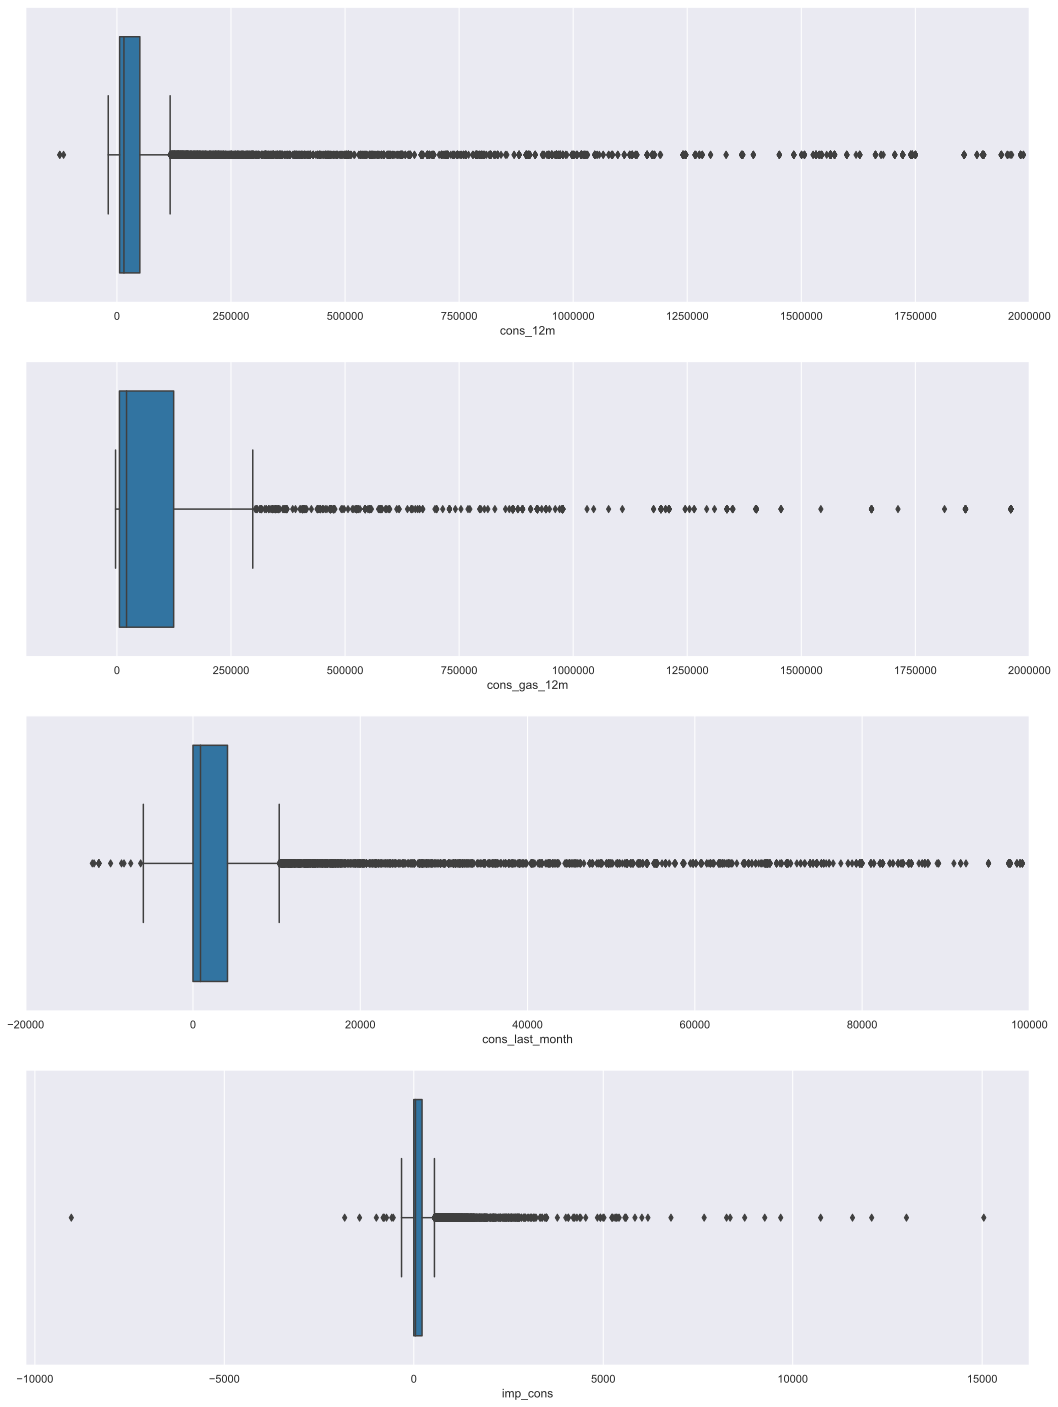

In [47]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

# Set x-axis limit
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)

plt.show()

#### CONNECTION TYPE (Electricity or Gas)

In [48]:
#select subset for type of connection
conn = train[["id", "has_gas", "churn"]]

In [49]:
#count companies by churn and connection type
conn_type = conn.groupby([conn["churn"],conn["has_gas"]])["id"].count().unstack(level=0)

#express as %age
conn_percentage = (conn_type.div(conn_type.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

#display dataframe
conn_percentage

churn,0,1
has_gas,,
f,89.636004,10.363996
t,92.105263,7.894737


Text(0.5, 1.0, 'Connection Type')

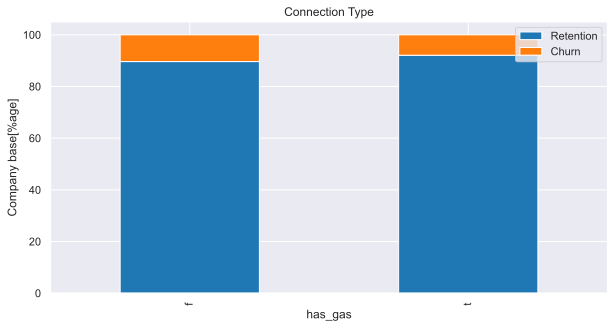

In [50]:
#plot connection types
conn_percentage.plot(kind='bar', stacked=True, figsize=(10,5))

# plot parameters
plt.legend(["Retention","Churn"], loc='upper right')
plt.ylabel("Company base[%age]")
plt.title('Connection Type')

###  5. Data Cleaning
Based on outputs from `3.Data Statistics` section we can drop a few irrelevant columns

In [51]:
train.drop(columns=["campaign_disc_ele", "date_first_activ",
                    "forecast_base_bill_ele","forecast_base_bill_year",
                    "forecast_bill_12m", "forecast_cons"], inplace=True)

In [52]:
#preview columns in cleaned dataframe
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


In [53]:
#stats fro history_data
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [54]:
history_data

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [55]:
history_missing_data = history_data.isnull().sum()/len(history_data.index)*100

Text(0, 0.5, 'Missing values (%)')

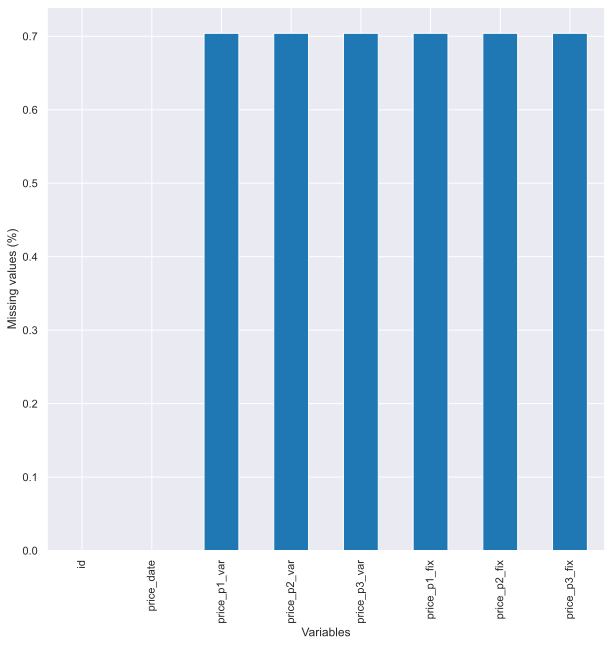

In [57]:
history_missing_data.plot(kind="bar", figsize=(10,10))
# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")

In [60]:
#display all enteries where even 1 entry is missing
history_data[history_data.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


**Since there is very less data missing and all columns are numeric, we can impute the missing values using median**

In [61]:
#impute missing values using median 
history_data.loc[history_data["price_p1_var"].isnull(),"price_p1_var"] = history_data["price_p1_var"].median()
history_data.loc[history_data["price_p2_var"].isnull(),"price_p2_var"] = history_data["price_p2_var"].median()
history_data.loc[history_data["price_p3_var"].isnull(),"price_p3_var"] = history_data["price_p3_var"].median()
history_data.loc[history_data["price_p1_fix"].isnull(),"price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"].isnull(),"price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"].isnull(),"price_p3_fix"] = history_data["price_p3_fix"].median()

**Fixing negative values in history_data**

There are negative values for `price_p1_fix` , `price_p2_fix` and `price_p3_fix` 

In [63]:
#check for negative entries
history_data[(history_data.price_p1_fix < 0) | (history_data.price_p2_fix < 0) | (history_data.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


There are only 10 entries with negative values. These can be because of corrupt data.
To improve our data, we can replace negative values with median values

In [64]:
#replace negative values with median values using loc method
history_data.loc[history_data["price_p1_fix"] < 0,"price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"] < 0,"price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"] < 0,"price_p3_fix"] = history_data["price_p3_fix"].median()

### PICKLING

In [67]:
#store the processed data for further use

pd.to_pickle(train, "processed_data/train_data.pkl")

In [68]:
pd.to_pickle(history_data,"processed_data/history_data.pkl")